# dataset description
this data set contains information about 10,000 movies collected from The Movie Database (TMDB), including user ratings and revenue. it contains over 10 thousand movies with 22 different attributes for each column are 
- id --> the movie ID in this data set
- imdb_id --> the movie ID on the site
- popularity -->  the popularity number of the movie
- budget --> the budget of the movie in US dollars (it's publishing year dollar value)
- revenue --> the revenue that the movie returned in US dollars (it's publishing year dollar value)
- original_title --> the movie title
- cast --> the crew in that movie
- homepage --> the link of the home page site for that movie
- director --> the movie director name
- tagline --> the movie tag line in the poster 
- keywords --> the keywords used in the search of that movie 
- overview --> a quick over view about the movie 
- runtime --> the movie run time duration
- genres --> the genres of the movie
- production_companies --> the production company of the movie 
- release_date --> the date of release 
- vote_count --> the count of voting for that movie on IMDB
- vote_average --> the average vote for the movie on IMDB
- release_year --> the year of release
- budget_adj -->the budget of the movie in US Dollar (2010)
- revenue_adj --> the revenue of the movie in US Dollar (2010)


# questions we need to answer using this data set
- what are most popular genres from year to year 
- what are the factors that determine the success or failure of a movie


## setting the importations

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline
plt.style.use('seaborn')
pd.set_option('display.max_columns', 100)


## creating the function that we will use throughout the project 

In [2]:
def exploder(df, col_name, sep=None): 
    """ this function is used when a row has multiple data in the same columns so we use this function to split those
        data into multiple rows when splitting all data in the other columns are the same ... the column that had multiple data 
        is the col that changed each row and the number of rows are correspondent to the number of data were in that column"""
    df = df.assign(var=df[col_name].str.split(sep)).explode('var') # here we explode the data in a new col named var
    return df.drop(columns=col_name).rename(columns={'var': col_name})# before returning the df we drop the original column that had the multiple data 
                                                                      # and name the col var by the same name of the column that had multiple data 

    

In [3]:
def get_composed_num(high_rev_df, low_rev_df, col_name, sep=None): #used to get the number of extinct values that exists in a specific  column in both data frames
    if sep is not None: # here we use the explode function if the separation character value was passed
        high_rev_df = exploder(high_rev_df, col_name, sep)
        low_rev_df = exploder(low_rev_df, col_name, sep)
    cond = high_rev_df[col_name].isin(low_rev_df[col_name])
    return  len(high_rev_df[cond][col_name].dropna().unique()) #we return the len of the non NA unique items that exists in both df on a specific col



In [4]:
def get_total_num(df, col_name, sep=None): # a function that is used to get the total number of a specific thing
    if sep is not None: # here we use the explode function if the separation character value was passed
        df = exploder(df, col_name, sep)
    return len(df[col_name].dropna().unique())



In [5]:
def ratio(part, whole): #returns ratio between two things
    return round(((part/whole))*100, 1)



In [6]:
def spliting_high_low(df, col_name, num=None): # function the is used to split the data frame into two data frames whether based 
    if num is None:                            # on a specific number given or the mean of the column
        high_df = df[df[col_name] >= df[col_name].mean()]
        low_df = df[df[col_name] < df[col_name].mean()]
    else:
        high_df = df[df[col_name] >= num]
        low_df = df[df[col_name] < num]
    return [high_df, low_df]

In [7]:
def plot_pie(percentage, labels, colors_=None, title_=None): #function that is used for plotting a pie chart 
    plt.pie(percentage, labels=labels, autopct='%1.1f%%', shadow=True, wedgeprops = {'edgecolor': 'black'},
            colors=colors_)
    if title_ is not None:
        plt.title(title_)
    plt.show()    

## reading the file and checking the data

In [8]:
df = pd.read_csv('tmdb-movies.csv') #reading the data frame


In [9]:
df.head() #having an over lock on the data frame

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
df.columns #checking the columns name

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [11]:
df.info() #getting the date frame info so we have some insight

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

# data wrangling 
 some columns are not related to our analysis so I will drop them off 
 the columns are ( id, imdb_id, home_page, vote_count, vote_average, tagline, keywords) 
 I will add another column called ratio to help me identifying the successful movies
 ###### note that 
- to make the ratio column we will use the revanue_adj and budget_adj so we                               have a fixed worth of dollar across all our movies 
- when dropping all the rows that have a NAN value the data shape will be reduced from more than 10 thousand to almost 1500 so we will only drop the NAN values of a certain columns when needing to analyze that column

In [12]:
df = df.drop(columns=['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'vote_count', 'vote_average']) # dropping undesirable columns
df['ratio'] = df['revenue_adj'] / df['budget_adj'] # this is used to easily identify successful  films from failed films

In [13]:
df.head()

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,release_year,budget_adj,revenue_adj,ratio
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015,1.379999e+08,1.392446e+09,10.090192
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015,1.379999e+08,3.481613e+08,2.522909
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015,1.012000e+08,2.716190e+08,2.683984
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015,1.839999e+08,1.902723e+09,10.340891
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015,1.747999e+08,1.385749e+09,7.927628


# analysis question 1: which most popular genre for each year
### grouping the data by the year

In [14]:
grp_df = exploder(df, 'genres', '|').dropna(subset=['popularity', 'genres']).groupby('release_year') #exploding the successful  in genres columns and dropping the NAN in popularity and grouping by the release year

### looping through each year getting the highest popularity

In [15]:
genres_df = pd.DataFrame(columns=['release_year', 'genres']) #creating the genres_df that have the highest popularity genres for each year
for year in df['release_year'].unique():
    genres_df = genres_df.append(grp_df.get_group(year).nlargest(1, columns=['popularity'])[['genres', 'release_year']])


### sorting the years in a descending order so it doesn’t become missy when plotting and resetting the original indexing and then deleting it

In [16]:
genres_df = genres_df.sort_values(by=['release_year'], ascending=[True]) #sorting the data from 1960 to 2015 in a ascending order
genres_df = genres_df.reset_index()
genres_df = genres_df.drop(columns=['index'])

### checking the genres data frame

In [17]:
genres_df.head()

,release_year,genres
0,1960,Drama
1,1961,Adventure
2,1962,Adventure
3,1963,Action
4,1964,Adventure


### plotting each year and the correspondent highest popularity genre in it
`note that`
- on the x_axis we will only put the last two digits of the year so it numbers doesn’t overlap


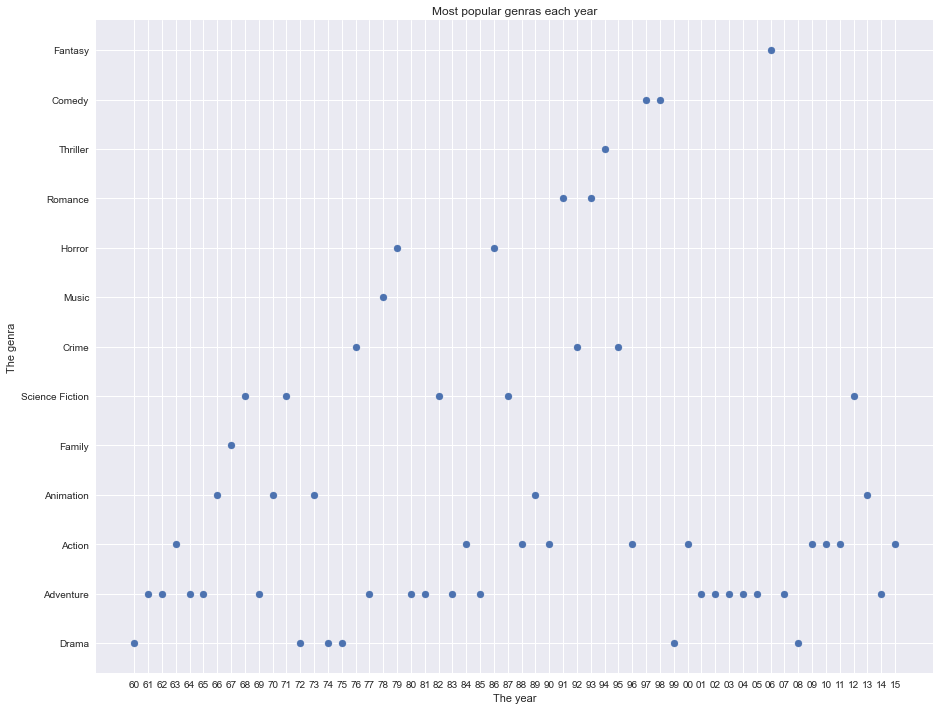

In [18]:
plt_1 = plt.figure(figsize=(15, 12)) # ascending  the fig size 
small_year = [str(x)[-2:] for x in genres_df['release_year']] #getting only the last two digits of the year for the plot
plt.scatter(small_year, genres_df['genres'])
plt.title('most popular genras each year'.capitalize())
plt.xlabel('the year'.capitalize())
plt.ylabel('the genra'.capitalize())
plt.show()

## and for more insight we could make a pie chart to see which genres was most popular throughout all those years 

In [19]:
genres_df['genres'].value_counts()

Adventure          17
Action             10
Drama               6
Animation           5
Science Fiction     5
Crime               3
Horror              2
Romance             2
Comedy              2
Family              1
Music               1
Thriller            1
Fantasy             1
Name: genres, dtype: int64

In [20]:
pie_df = pd.DataFrame(genres_df['genres'].value_counts())
pie_df

,genres
Adventure,17
Action,10
Drama,6
Animation,5
Science Fiction,5
Crime,3
Horror,2
Romance,2
Comedy,2
Family,1


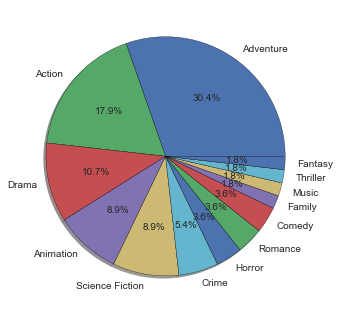

In [21]:
plot_pie(pie_df['genres'], pie_df['genres'].index)

# analysis question 2: which factors affect the success or a failure of a movie and what is its percent
### studying another factors to know which effect the success of a movie

In [22]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'overview', 'runtime', 'genres', 'production_companies', 'release_date',
       'release_year', 'budget_adj', 'revenue_adj', 'ratio'],
      dtype='object')

### getting data frames for successful movies and failed movies
    on this analysis I will assume the movie is successful if it had gained revenue that is double its budget
                    (successful movies = high_rev_df)     (failed movies = low_rev_df)


In [23]:
high_rev_df, low_rev_df = spliting_high_low(df, 'ratio', 2) # splitting the data frame into two successful and not successful movies 


# the properties we will discuss are 
- 1) director
- 2) cast
- 3) production company
- 4) the movie budget


### first property we will discuss is the director 
 to find whether or not a director has an influence on the success of a movie first we will see if there are directors in our list that had been in both successful and failed movies ...
<br>if not then it's crystal clear that directors affect the movie success and failure ... and if true then we will start analyze that portion to find the percentage of effectiveness


In [24]:
num_composed_directors = get_composed_num(high_rev_df, low_rev_df, 'director', sep='|')
num_composed_directors

806

In [25]:
num_total_directors = get_total_num(df, 'director')
num_total_directors

5067

In [26]:
director_eff_percentage = 100 - ratio(num_composed_directors, num_total_directors)
director_eff_percentage

84.1

## as we see there is a number of directors that have been in both successful and unsuccessful movies 
- the number of composed director divided by the number of the total directors will give us the percentage of how directors doesn’t effect the success of a movie and if we subtracted it from 1 we will get the percentage of how much directors effect the success of a movie

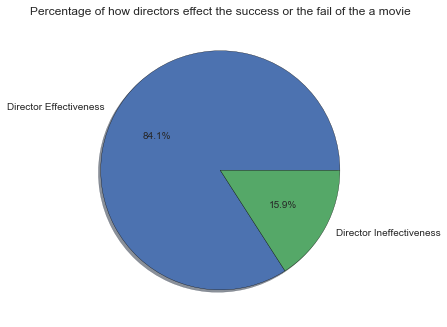

In [27]:
percentage = [director_eff_percentage, 100-director_eff_percentage] #we sub from 100 cause nums are in a percentage form
labels = ['Director Effectiveness', 'Director Ineffectiveness']
title = 'Percentage of How directors effect the success or the fail of the a movie'.capitalize()

plot_pie(percentage, labels, title_=title)

# the next factor that we will focus on is the cast 
<br> we will check the number of actors that have been in both success and failed movies to determine the portion that the cast provide to the success of a movie 
<br> `note that`
- the cast names are combined in one column separated by a '|' so we will handle this while creating both of our lists
- we will drop the NAN rows prior to looping making the data clean for looping (we will not drop it permanently)


In [28]:
num_composed_actors = get_composed_num(high_rev_df, low_rev_df, 'cast', sep='|')
num_composed_actors

2866

In [29]:
num_total_actors = get_total_num(df, 'cast', '|')
num_total_actors

19026

In [30]:
actor_eff_percentage = 100 - ratio(num_composed_actors, num_total_actors)
actor_eff_percentage

84.9

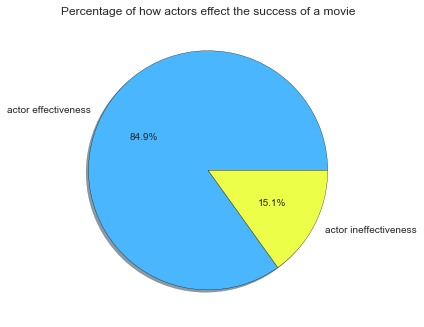

In [31]:
percentage = [actor_eff_percentage, 100-actor_eff_percentage]
labels = ['actor effectiveness', 'actor ineffectiveness']
title = 'percentage of how actors effect the success of a movie'.capitalize()
colors=['#49B6FE','#EDFE49']
plot_pie(percentage, labels, colors, title)


#### actor’s percentage in making a movie successful is 84.94%
# the third aspect is the production company 
we will do the same that we did with actors 

In [32]:
# pc --> production companied
composed_PC_num = (get_composed_num(high_rev_df, low_rev_df, 'production_companies', sep='|'))
composed_PC_num

1113

In [33]:
total_pc_num = get_total_num(df, 'production_companies', '|')
total_pc_num

7879

In [34]:
pc_effectiveness = 100 - ratio(composed_PC_num, total_pc_num)
pc_effectiveness

85.9

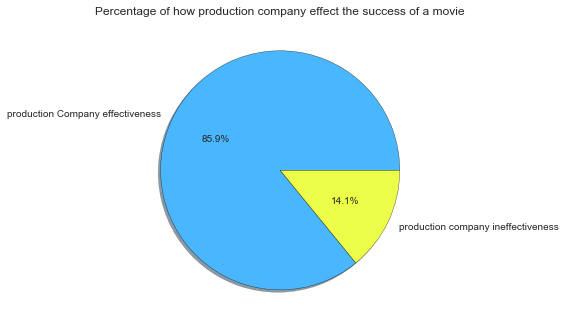

In [35]:
percentage = [pc_effectiveness, 100-pc_effectiveness]
labels = ['production Company effectiveness', 'production company ineffectiveness']
title = 'percentage of how production company effect the success of a movie'.capitalize()
plot_pie(percentage, labels, colors, title)

### the success percentage that a production company gives is 85.9
## fourth factor we will discuss is the budget factor

In [36]:
# here we will use the mean not the median because more than half of the data having budget_adj of 0.0 so using the median
# will give us 0.0 which doesn’t help in separating the movies to a high budget df and a low budget df 
high_budget_high_rev, low_budget_high_rev = spliting_high_low(high_rev_df, 'budget_adj')


high_budget_low_rev, low_budget_low_rev = spliting_high_low(low_rev_df, 'budget_adj')


In [37]:

ratio_high_budget_sucess = 100 - ratio(len(high_budget_high_rev), len(high_rev_df))
ratio_high_budget_fail = 100 - ratio(len(high_budget_low_rev), len(low_rev_df))
ratio_low_budget_sucess = 100 - ratio(len(low_budget_high_rev), len(high_rev_df))
ratio_low_budget_fail = 100 - ratio(len(low_budget_low_rev), len(low_rev_df))


print(ratio_high_budget_sucess)
print(ratio_low_budget_sucess)

print(ratio_high_budget_fail)
print(ratio_low_budget_fail)

67.7
32.3
65.3
34.7


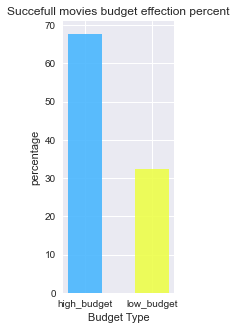

In [38]:
plt_1 = plt.figure(figsize=(2, 5))
x_label = ['high_budget', 'low_budget']
y_label = [ratio_high_budget_sucess, ratio_low_budget_sucess]
plt.bar(x_label, y_label, color = colors, alpha=0.9, width=0.5)
plt.title('succefull movies budget effection percent'.capitalize())
plt.xlabel('Budget Type')
plt.ylabel('percentage')
plt.show()

- as we see that movies with high budget have better chance to be successful ... but this is a false claim cause for low budget we will find the movies with high budget have the almost percentage to fail  

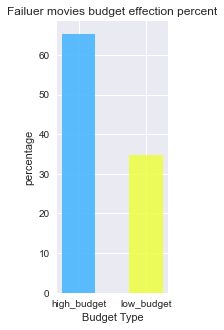

In [39]:
plt_1 = plt.figure(figsize=(2, 5))
x_label = ['high_budget', 'low_budget']
y_label = [ratio_high_budget_fail, ratio_low_budget_fail]
plt.bar(x_label, y_label, color = colors, alpha=0.9, width=0.5)
plt.title('failuer movies budget effection percent'.capitalize())
plt.xlabel('Budget Type')
plt.ylabel('percentage')
plt.show()

- and as we see movies with high budget have almost the same probability to success and fail and so on for low budgets i.e. the budget doesn’t affect  the successfulness or failure of a movie

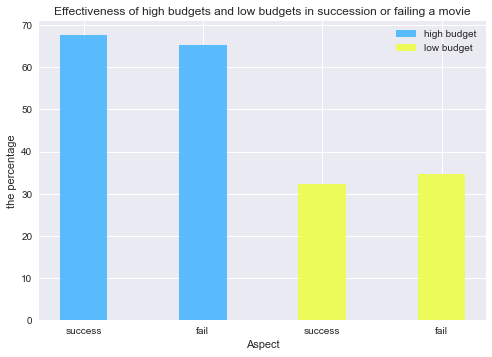

In [40]:

x_labels = [1, 3, 5, 7]
y_labels = [ratio_high_budget_sucess, ratio_high_budget_fail, ratio_low_budget_sucess, ratio_low_budget_fail]

plt.bar(x_labels[0:2], y_labels[0:2], color=[colors[0], colors[0]], alpha=0.9, label='high budget')
plt.bar(x_labels[2:], y_labels[2:], color=[colors[1], colors[1]], alpha=0.9, label='low budget')

plt.xticks(x_labels, ['success', 'fail', 'success', 'fail'])
plt.xlabel('Aspect')
plt.ylabel('the percentage')
plt.title('effectiveness of high budgets and low budgets in succession or failing a movie'.capitalize())
plt.legend()
plt.show()

# finally 
### we will plot the factors that effects the success of a movie and the percentage of it

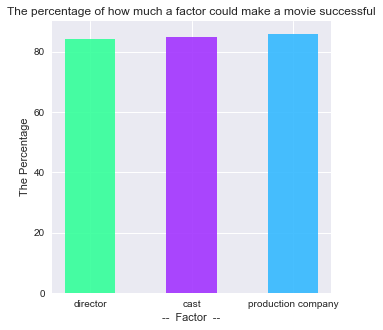

In [41]:
plt_1 = plt.figure(figsize=(5, 5))
x_labels = ['director', 'cast', 'production company']
y_labels = [director_eff_percentage, actor_eff_percentage, pc_effectiveness]
colors = ['#33FF99', '#A233FF', '#33B8FF']
plt.bar(x_labels, y_labels, color=colors, alpha=0.9, width=0.5)
plt.title('the percentage of how much a factor could make a movie successful'.capitalize())
plt.xlabel('--  Factor  --')
plt.ylabel('The Percentage')
plt.show()

## to display the effect more clearly we will use a pie char 

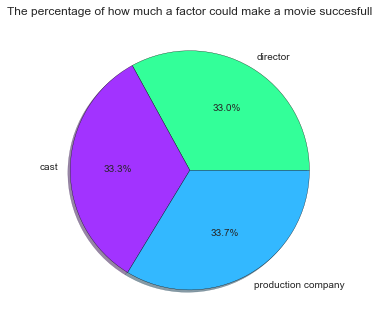

In [42]:
percentage = [director_eff_percentage, actor_eff_percentage, pc_effectiveness]
labels = ['director', 'cast', 'production company'] 
title = 'the percentage of how much a factor could make a movie succesfull'.capitalize()
plot_pie(percentage, labels, colors, title)

# conclusion 

- as we have seen above there were 13 genres of movies that was most popular each year from 1960 to 2015 ... it's clear that some genres make it most popular almost one year like (fantasy & thrill) and other dominates for 10 years or more like (adventure & action) and in both the scatter plot and the pie chart all if that is explained 

- in the analysis of which factor effect the success of a movie or not we have exploited the data of 4 aspects (director, cast, production company, budget) and we have seen that budget doesn’t have at least a reasonable amount of effect that we could address so we have neglected it ... and for the other 3 aspects as seen in the pie chart above that the affection percentage doesn’t vary a lot from one aspect to another 

- the limitation of the analysis that other factors could be measured alone like the duration of the movie or the (month or season) of release and we could even combine two aspects and analyze their effect like a certain cast at a specific years or multiple years or even the genre correspondent to the current events at the world like did a type of movies become more popular after an event like 9-11 or even did the movies about sci-fi and viruses become more popular after corona and so on
